# The seaborn library 
built on matplotlib 

it is also a visualisatio library

easy to use and very dynamic

can easily work with pandas

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline
# to view the data set

# loading a dataset in seaborn

syntax : sns.load_dataset('  {name of your dataset}   ')

In [3]:
tips= sns.load_dataset('tips')

# seaborn has some built in data sets 'tips' is one of them

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## different plot types in seaborn

# 1. distplot: plotting of only one variable

sns.distplot(  '{only a single variable/column from a datafrma}', kde=True/False, bins='num value'  )

plots only numerical values maybe

kde= true➡️show the line 

    false➡️no line
    
bins= no of entries to plot

as bin increase the graph gets more vivid as it plots more and more results/

C:\Users\yashv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

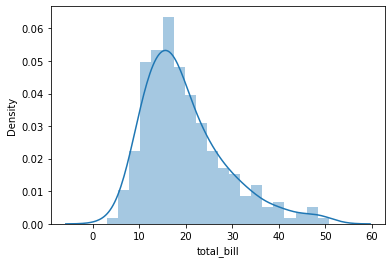

In [5]:
sns.distplot(tips['total_bill'],bins=20,kde=True)

# see how displot does everything{sorts x and y or set the scale etc..} wiht our one column all we need to is just give the name

# 2. Jointplot

shows relationship between x and y 

display a scatterplot of comparision for x and y

also so displots of x on axis and y on y axis

kind: type of comarision to show➡️can be changed accordingly
    
 syntax: sns.jointplot(x= '{data on x axis}', y='{data on the y axis}',  data={dataset to pick x and y from}, kind={type of graph}    )

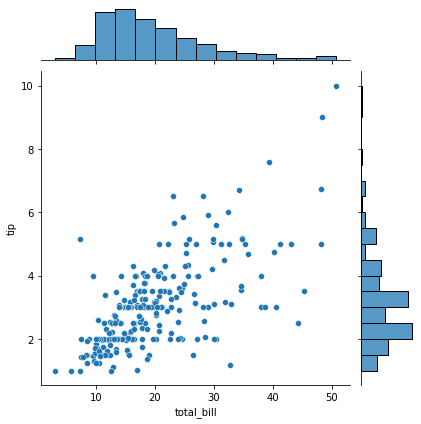

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips)

# THE scatterplot IS SHOWN BY DEFAULT 
# IT CAN BE CHANGED BY KIND ATTRIBUTE

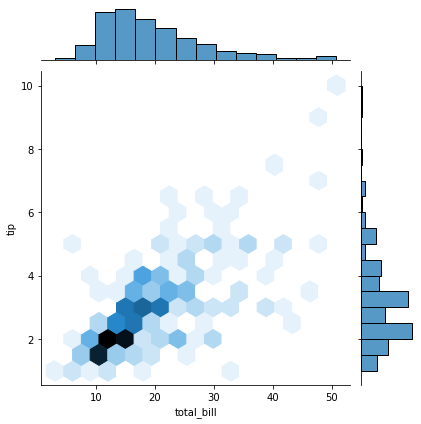

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

# this is hexagram shows density in darkness and scattering through distance between hexagons
# insight: as bill amt increase tip value increases but most tips of the day comes from low amount bill cutomers

# 3.pairplots
plot graph between every possible column in from a data set 

all we need to do is fill in the dataset

hue is used to scrutenize any categorical data that is data which  doesent have any numerical value instead it has category like  cars columns can have either auto or manual

palettle is used to give color to a the different types of data in the column given in hue

sns.pairplot(  {name of the dataset} ,  hue=' {name of the column with categorical data}  ',  palatte='colorform')



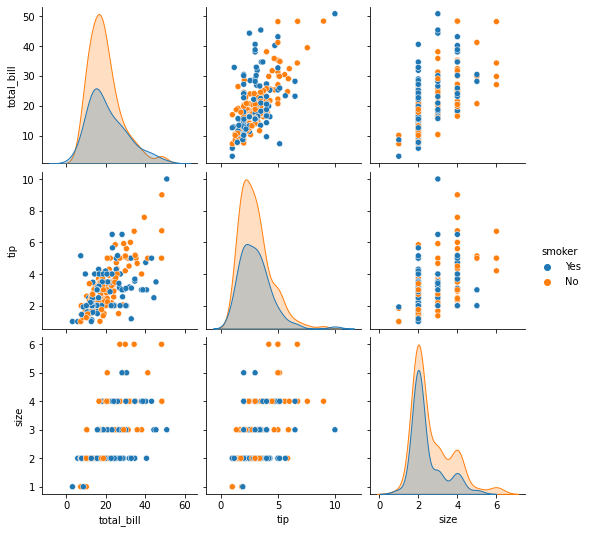

In [8]:
sns.pairplot(tips,hue='smoker')

# see how when we set hue param for smoker

# how it differs between smokers and non  smkoers

# keep in mind hue taKes up only categorical data

# 3. rug plot

used to  genrate the kde in the distplot: more density in rugplot means higher the tip of the KDE[Kernel Distribution Estimate]

takes in a particular column of a data set 

each point on the data set in represented by a 'dash'➡️{ | }

more the density of dashes more the entries there

<AxesSubplot:xlabel='total_bill'>

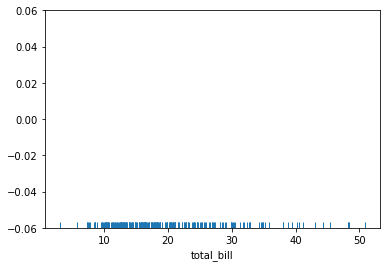

In [9]:
sns.rugplot(tips['total_bill'])

C:\Users\yashv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

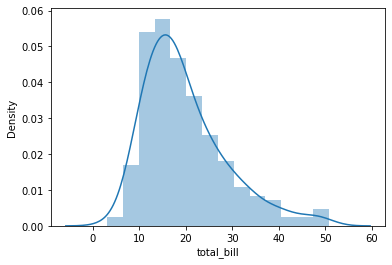

In [10]:
sns.distplot(tips['total_bill'])

each rug plot dash when given a normal distribution curve finally gives us a KDE line 

as the density of normal dist plots increase our kde tip starts to go up

normal distribution curve is basically a curve structute which goes up at a particular point

(0.0, 1.0)

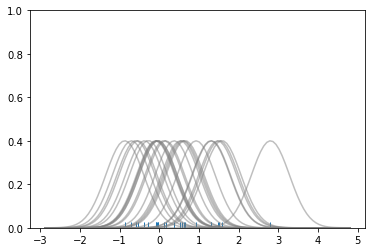

In [11]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

each of these curves above a normal distibution curves as you can see the density increases in the middle

each normal curve has a rug plot dash attached to it 

Text(0.5, 0.98, 'Sum of the Basis Functions')

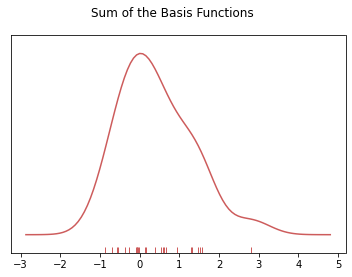

In [12]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

so when we create a kde from the aboe normal curves it comes out to be like this 

the kde plots the densoty of the normal curves

# how to build a KDE plot from a dataset 

sns.kdeplot( name of dataset[the particular column]  )

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

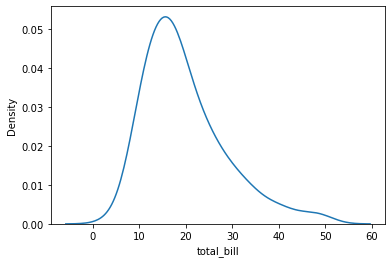

In [13]:
sns.kdeplot(tips['total_bill'])

# Categorical data

data which is diveed into categories instead of numbers 

ex: car can be either divded to auto or manual no other numerical quantity \



## dealing with categircal data using seaborn tools

### 1.using the barplot
barplot is a type of graph where some numeric data is reprsented when applied to categircal data by the help of a mathematical function 

the mean of is the default mathematical function applied on the data on both the axis

example: when total_bill(numeric data) mean(mathematical fuction) is aplied to gender of customers(categorcial data)
we get a graph as shown below

syntax: sns.barplot(    x='name of the column{categorical}' y='name of the column{numeric}' data=name of dataset, estimator=name of your funciton to apply)

estimator is the parameter which decides the collection or the grouping or aggregation of data this simply put it is the maths function applied

In [14]:
import seaborn as sns
%matplotlib inline
import numpy as np 

In [15]:
tips = sns.load_dataset('tips')

In [16]:
tips.head()


# alwyas use head when viewing data not the dataframe name alone

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## for mean { default} in barplot: below

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

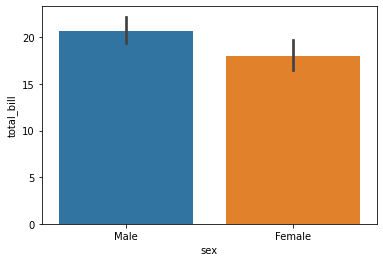

In [17]:
sns.barplot(data=tips,x='sex',y='total_bill')
# below we see the mean of total bill of males and total bil of females

# total bill: numeric value
    
# sex: categorical data for putting mumerics into
    
# mathematical functionl: mean

## for standard deviation between male and female for totalbill
standart dev is the how the value of data deviates from the mean 

the deviation is called variance

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

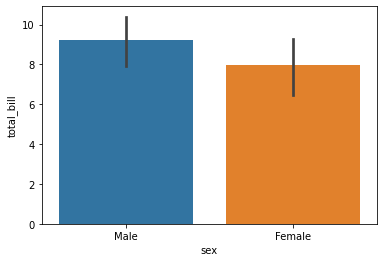

In [18]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
# we used numpy to apply the standard deviation function 

# the countplot

it shows the how many times the categorcal data in the x axis hs been repeated

takes up only x axis 

y axis show recurrence

syntax: sns.countplot(   x={categorical data},    data={data set name}    )

<AxesSubplot:xlabel='sex', ylabel='count'>

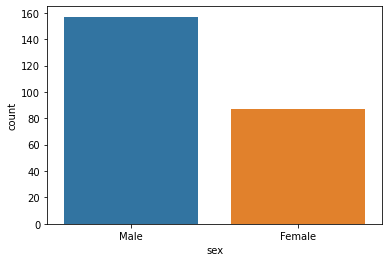

In [19]:
sns.countplot(x='sex',data=tips)

### box plots

box plot show the ditribution of a numeric value in diffrent categories of catgorical data

the long sticks or whiskers show the distribution across that category and the boxes inside them represent the  highest density of numeric data in that category

bigger the size of the box the more widely spread our data is

sytax: sns.boxplot(x='categorical data', y='numric data' data=name of dataset)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

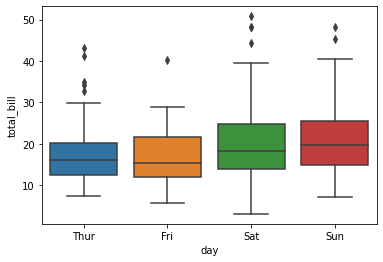

In [20]:
sns.boxplot(x='day',y ='total_bill',data=tips)

above we see how total bill value on different days

numeric data values in different categories

dots are outliners that is data that is not relevant

boxes reprsent where the numeric data is most dense in that particular category



<AxesSubplot:xlabel='time', ylabel='total_bill'>

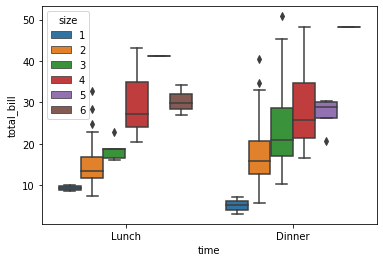

In [21]:
sns.boxplot(x='time',y='total_bill',data=tips,hue='size')

### hue:to divde the data into further sub categories using another column of categircal data

# violin plot/

violin plot also represents the density and distribution of numercial data in different categories of categorcial data

it also takes up cat data on the x axis and numeric data on the y axis

hue can also be used inside violin plots

VIOLIN PLOTS CAN BE COMBINED WHEN HUE IS  using the parameter

SYNTAX: sns.violiplot(x='cat coloumn', y='num column', data=name of dataset, hue='sub category name' , split=True/False)

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

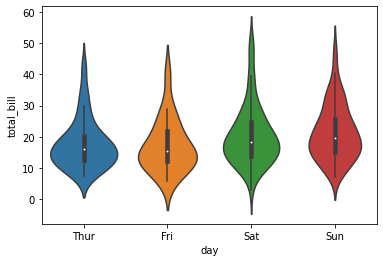

In [23]:
sns.violinplot(x='day',y='total_bill',data=tips)
# the region represens where the most density lies 

# basically it is 2 kde joined together 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

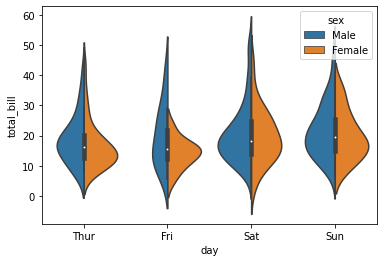

In [24]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex', split=True)

## scatterplot

creates a scaettering point graph between categorical data and numerical data

each num data is represented as dot on the plot

they can also be combined with violin plot to create swarnplot

it has both hue and split fucntionalities

sns.scatterplot(x='cat coloumn', y='num column', data=name of dataset, hue='sub category name' , split=True/False)





<AxesSubplot:xlabel='day', ylabel='total_bill'>

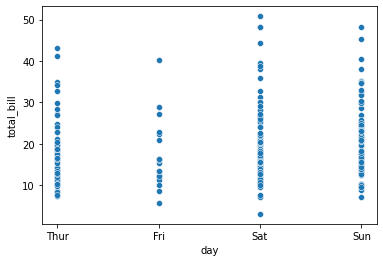

In [25]:
sns.scatterplot(x='day',y='total_bill',data=tips)

# the linelike region represent high denssitties

# Swarm plot
a scatter plot but in violin style

<AxesSubplot:xlabel='day', ylabel='total_bill'>

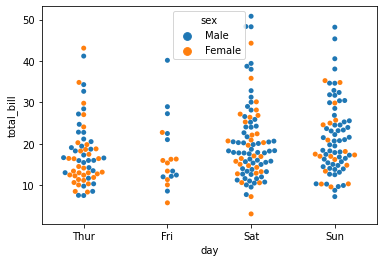

In [26]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex')

# a swarn plot is a violin plot like representation on scatter points 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

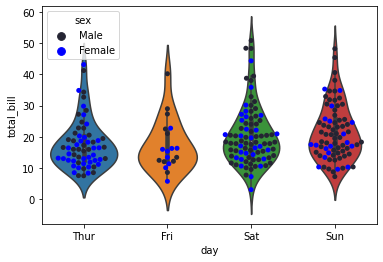

In [27]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',color='Blue')
# overlapping both the plots: write them on the same block

# the factor plot {key to all plots}

any of the plots can be accessed using factor plot 

it is the genral method of plotting any type of graph

x takes in categorical data

y takes in numerical data

hue and split depends on the kind of graph you are plotting

sns.factorplot(x='cat column' y='num column', data= dat name, kind={kindd of plot you wanna bring in}  )

C:\Users\yashv\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


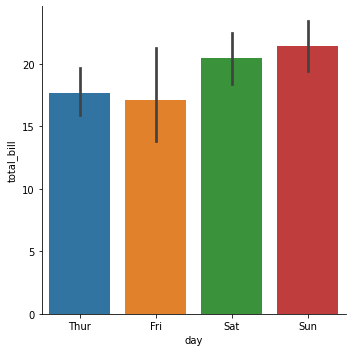

In [28]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [29]:
tips=sns.load_dataset('tips')

In [30]:
flight=sns.load_dataset('flights')

In [31]:
tips.head()
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# using a heatmap 

a heatmap esthablished relationship bwteen 2 co related values

it plots a gradient or a spectrum scale on basis of color

works only when a matrix is provided

a matrix is data set where the index and the columns are related in any manner

matrix shows any possible relation between all the data typess in a matrix

        SYNTAX: sns.heatmap(name of data set,   annot=True/False, cmap='coloring style')
        
    annot=true: shows the numerical correlaiton values in a heatmap


In [33]:
tc = tips.corr()
# corr() method shows relatonship between all the columns in a datafrmae

In [34]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

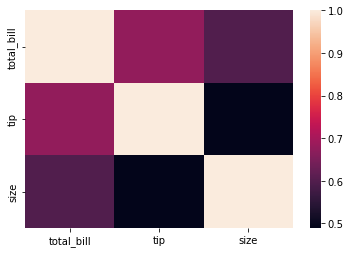

In [35]:
sns.heatmap(tc)

<AxesSubplot:>

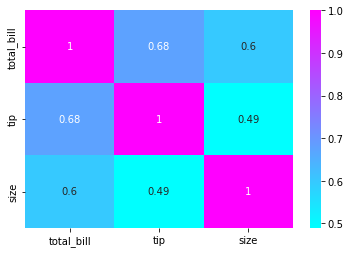

In [36]:
sns.heatmap(tc,annot=True,cmap='cool')

In [37]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
fl = flight.pivot_table(index='month',columns='year',values='passengers')

In [39]:
fl
# here we created a relation between years and monhts in no of flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

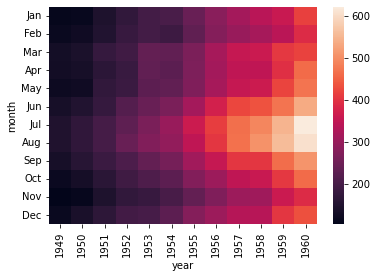

In [40]:
sns.heatmap(fl)

### attributes of a heatmap

1.cmap='color setting name' : sets the color setting for the map

2.linewidths = num : sets the width between the boxes of the map 

3.linecolor = 'color name': sets the color of the line joining the boxes

<AxesSubplot:xlabel='year', ylabel='month'>

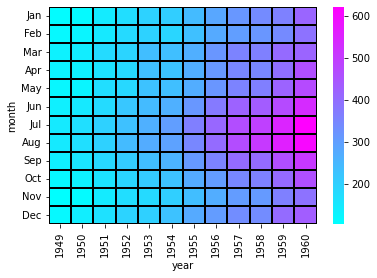

In [41]:
sns.heatmap(fl,cmap='cool',linecolor='black',linewidth = 2)

# cluster maps

clustermaps try to create relations betwen data using clustering 

this makes the data change from the pre set x axis and y axis

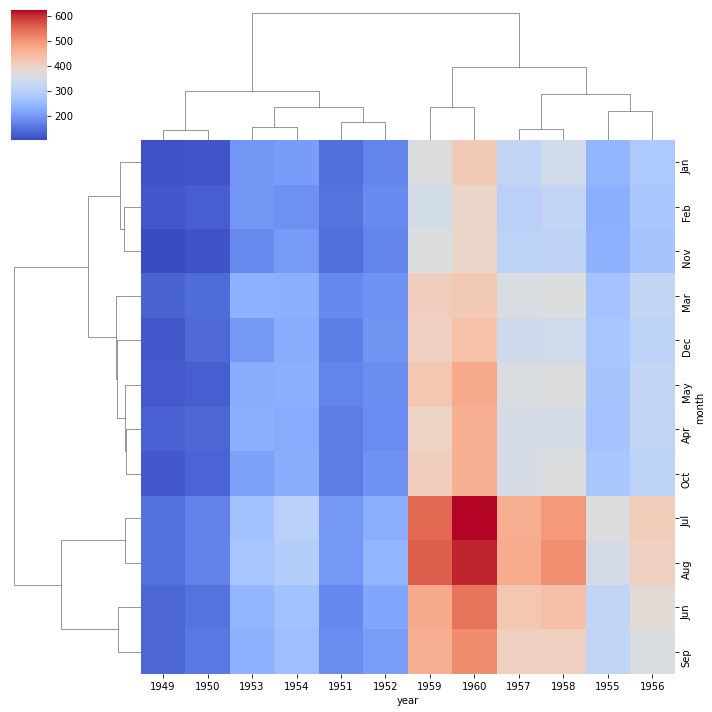

In [42]:
sns.clustermap(fl,cmap='coolwarm')
# the flowchart shows relation between different numbers in x and y axis

# Pairplot

pairplot is used to plot all kinds of graph in a grid 

we just need to fill in the dataset and youre good to go

# Pairgrid

you can also fill in different graphs at diifferent places on the grid

we use the pairgrid for that it has 

1. diagonals

2. uppeer grid

3. lower grid



to use the these the syntax is as follows

step1 :  make an empty grid plot using: sns.PairGrid(   data set name   )

for diagonal: grid_name.map_diag(  type of graph on diagonal cells   )

for upper grid: grid_name.map_upper(  graph type  )

for lower grid: grid_name.map_lower(  graph type  )

In [43]:
import seaborn as sns
%matplotlib inline

In [44]:
iris=sns.load_dataset('iris')

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


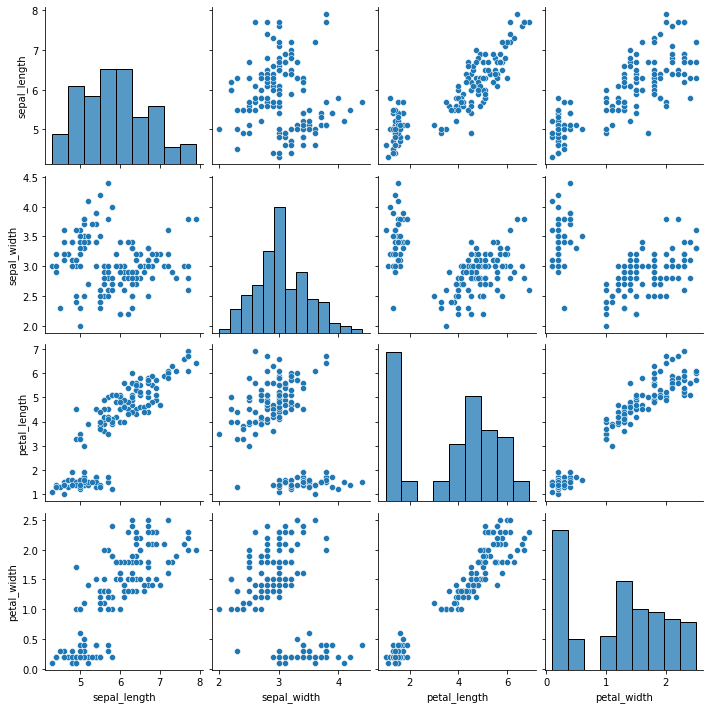

In [46]:
sns.pairplot(iris)
# this is a pariplot relating all the columns in the dataset

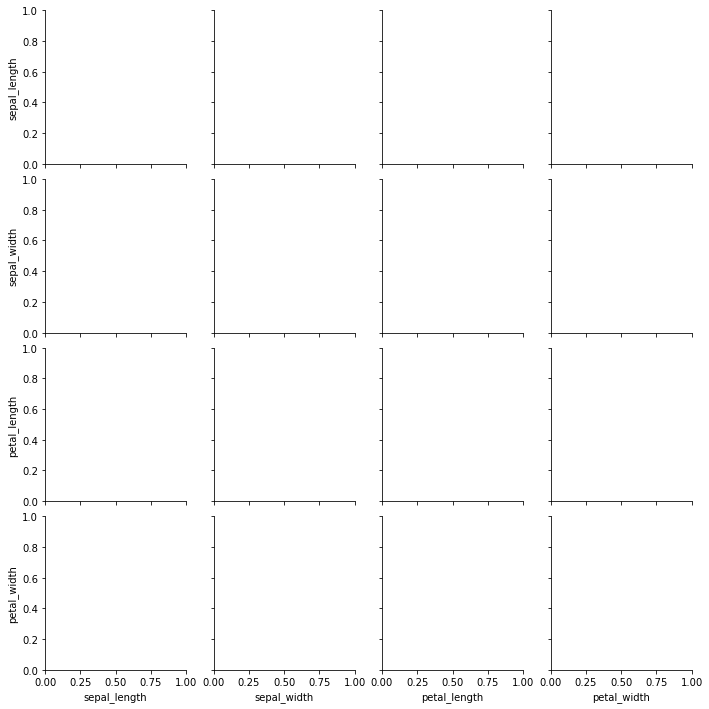

In [47]:
pg=sns.PairGrid(iris)
# step 1: make the grid

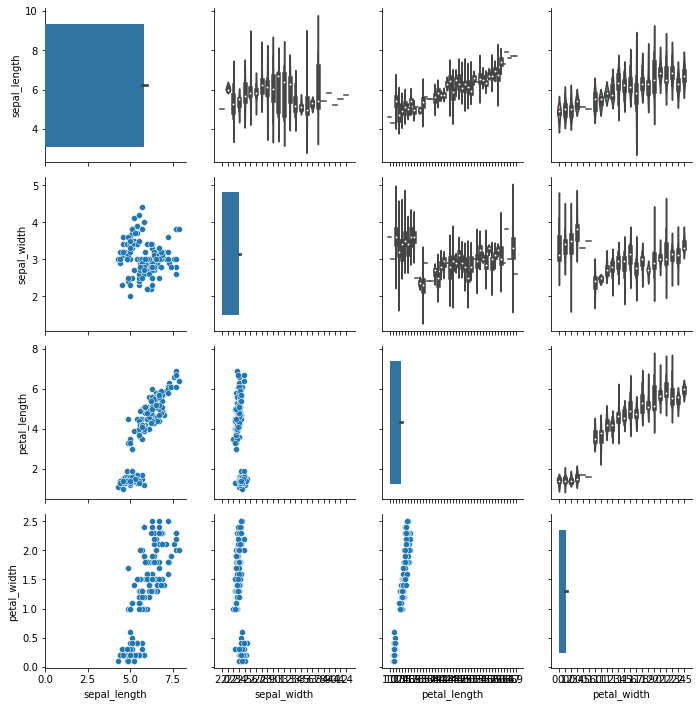

In [48]:
pg=sns.PairGrid(iris)
pg.map_upper(sns.violinplot)
pg.map_lower(sns.scatterplot)
pg.map_diag(sns.barplot)

In [49]:
# PairGrid is used to create customizable plots in a grid patterns

In [50]:
import seaborn as sns

# Faceplots

they are used to create a grid of plots

they take categorical data in rows and columns 

while taking a numeric data to represent them just like violin and box plots and others

the categorical data is not on the axis it is just used to divide the rows and columns into categories

you can also give in more than one type of numeric data if the plotted graph requires different attributes on x and y axis

## syntax 

variable name= sns.FaceGrid( data= {name of datser}, col= {column caterorical data}, row= { row categircial dta} ) 

var_name.map(graph type, name of numeric dta column/columns   )

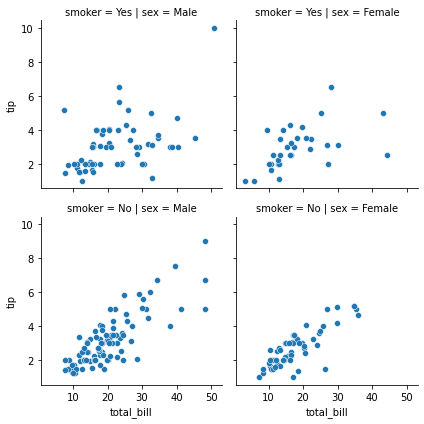

In [51]:
fp=sns.FacetGrid(data=tips,col='sex',row='smoker')
fp.map(sns.scatterplot,'total_bill','tip')

# see how rows and cols are divided into categories according the categorical data

# for scatter plot you need both x and y axis so we fed total bill and tips as them 

# LMPLOT()

plot which combines a scatter plot and a regression line

regression line makes a linear connection between the given 2 attributes

lmplot takes in 

x axis data

y axis data

the given data set 

hue

the color palette 

marker style


    it can also be divided into grids
    
    grids can be only columms 
    
    or both columns and rows

syntax: 
sns.lmplot(x='col name', y='col name', data=ds_name,hue='name of sub category',palatte='type of palette',marker=[list of marker style], col='cat data col name' row='cat data row name')

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


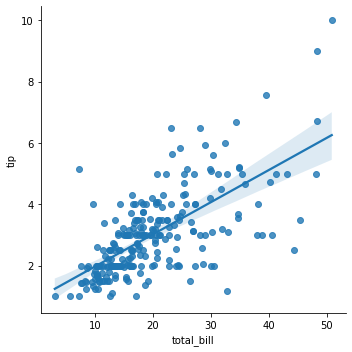

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips)
# only a single data plot without any hue or else

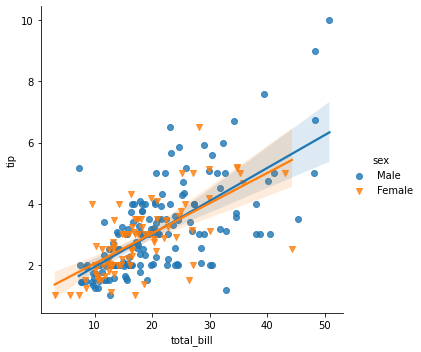

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])
# with a hue
# a marker style list of 2 can only be added to single graph if a hue is applied
# for more graphs you need to add more hues accordingly

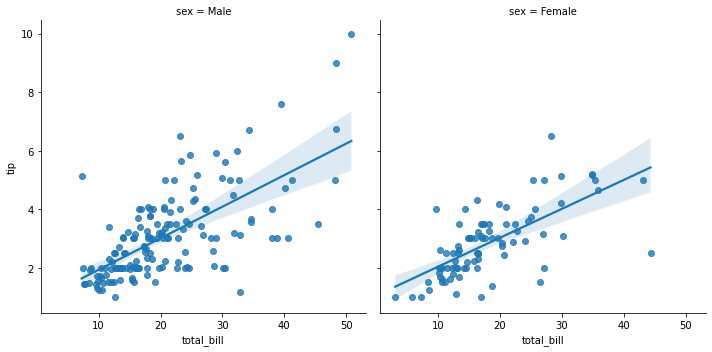

In [55]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')
# the hue can be dividedd into sub categories by adding it as a column 

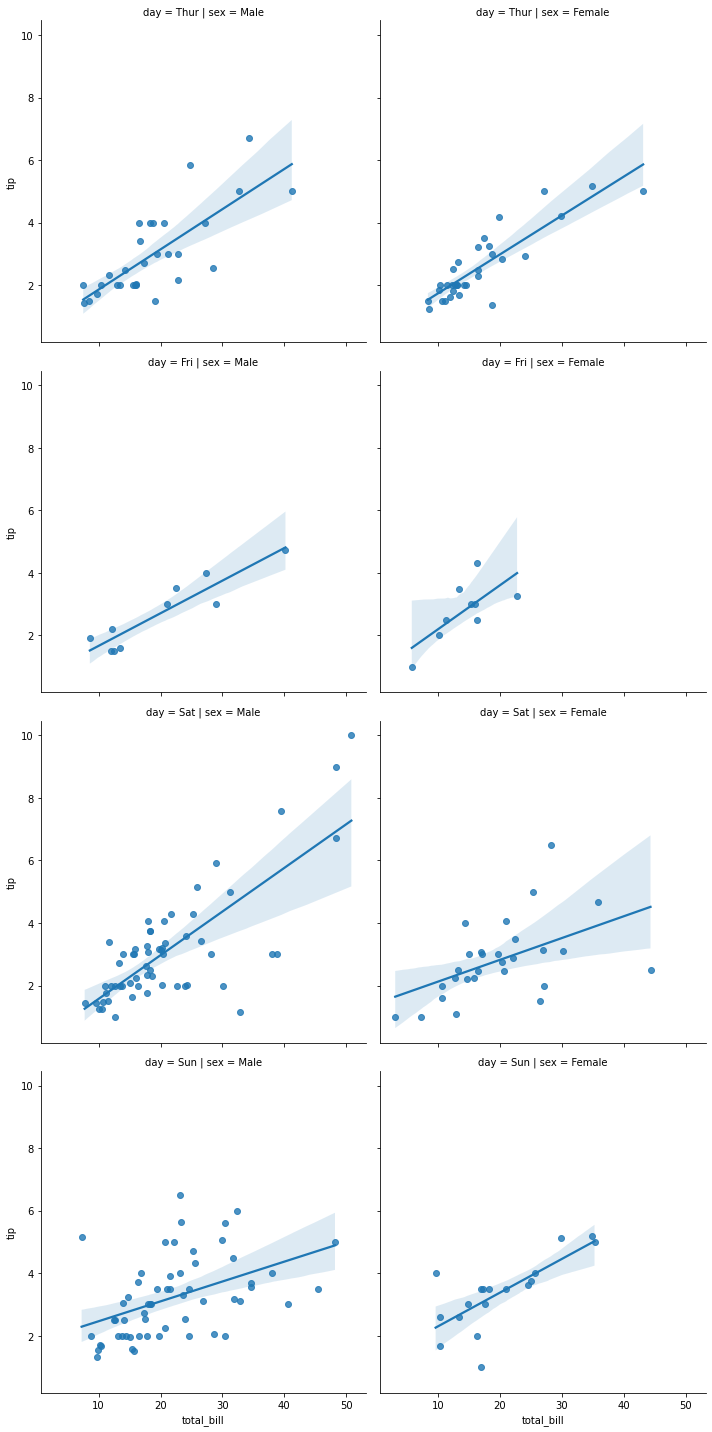

In [56]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='day')

# Aspect and size

sometimes the graph size and aspect of the lmplot need to be changed thats where aspect and size come in 

aspect: ration of height and width 

size: size of the output graphs

syntax:sns.lmplot(x='x column', y='y column', aspect =  {num value}, size=  {num value}  )


C:\Users\yashv\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


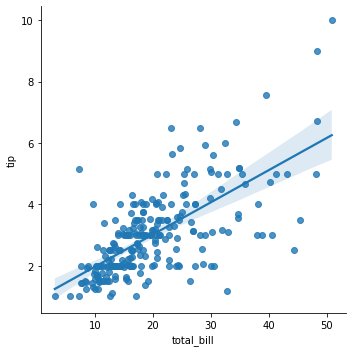

In [57]:
sns.lmplot(x='total_bill', y='tip',data=tips,aspect=1,size=5)

# how to change fonts in seaborn 

step1 : set the context to either paper{default}, notebook, talk, poster
    
step2: changing font scale
    
    sns.set_context('style name', font_scale=  {numerical value}  )
    
step3: prepare the graph

sns.graph_style(x , y , data)

In [58]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

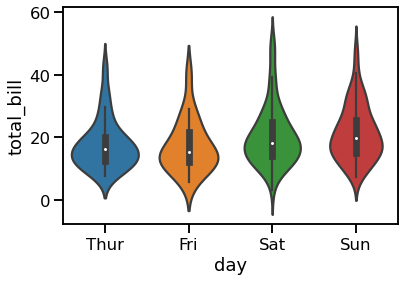

In [59]:
sns.set_context('talk',)
sns.violinplot(y='total_bill',x='day',data=tips)

# context type is used to prepare the setup of the data accordingly to the meeting

# adding style to the graphs
types of style

    white.
    
    dark.
    
    whitegrid.
    
    darkgrid.
    
    ticks.
    
 sytax: sns.set_style('style_name') 

then set the graph and its data

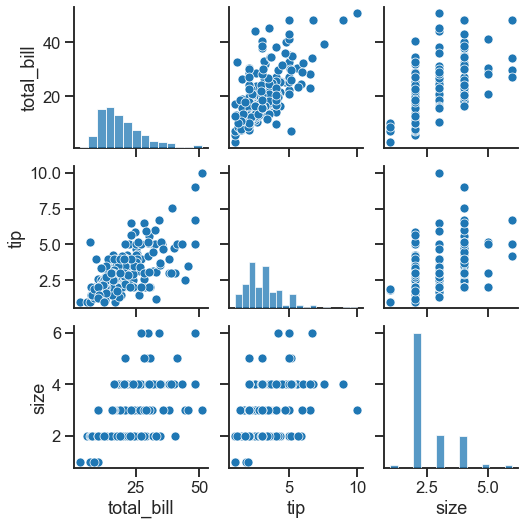

In [60]:
sns.set_style('ticks')
sns.pairplot(tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

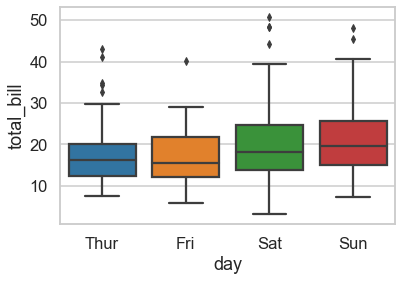

In [61]:
sns.set_style('whitegrid')
sns.boxplot(x='day',y='total_bill',data=tips)

#  the grid lines in the back are due to the  white grid


# Removign spine of the data

spie is the top border line and the right border of the displayed graph

they are always shown by default

but they can be removed

syntax:
    step1: set the graph with its data
    
    step2: remove the spines within the same cells
        
        sns.despine()
        
        or 
        
        sns.despine(left=True)➡️removes a line  from the y axis too

# note!!!: whenver you apply a style it keeps on going even if you move on to the next  graph

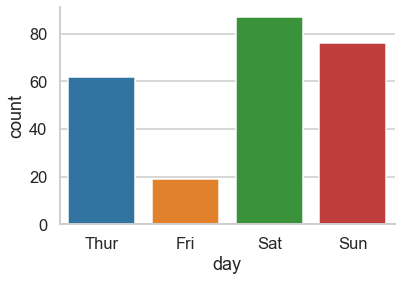

In [62]:
sns.countplot(x='day',data=tips)
sns.despine()
# removing top and right borders

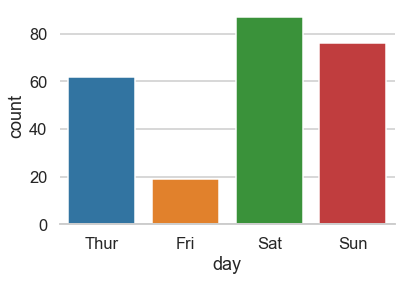

In [63]:
sns.countplot(x='day',data=tips)
sns.despine(left=True)
# removing the left line from the x axis too

# using the figsize() in seaborn

we ca use fig size in the seaborn lLibrary 2. It can. Easily override the Sea bond code and. Be implemented on the plotted graph

syntax:

step1: plt.figure(figsize( {height},  {width}  )

step2: sns.(x=' cat column', data= dataset names) 

In [64]:
import matplotlib as plt

In [65]:
plt.figure(figsize=(17,7))
sns.lmplot(x='total_bill',y='tip',data=tips)

TypeError: 'module' object is not callable